#### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from prettytable import PrettyTable
%matplotlib inline

#### Data Input

In [2]:
#loading csv file using pandas to a dataframe
data = pd.read_csv('insurance.csv')

#first five rows of the dataframe
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#no. of rows and columns 
data.shape

(1338, 7)

In [4]:
#getting some inforamtion about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<b>Categorical Features:
- sex
- smoker
- region

<b>Numerical Features:
- age
- bmi
- children

In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values in the dataset.

### Data Analysis

In [6]:
#statistical measures of the dataset

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


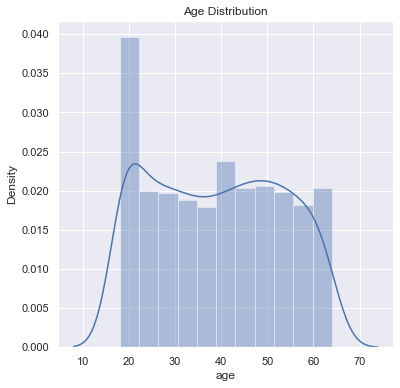

In [7]:
#distribution of age value

sns.set()
plt.figure(figsize = (6,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

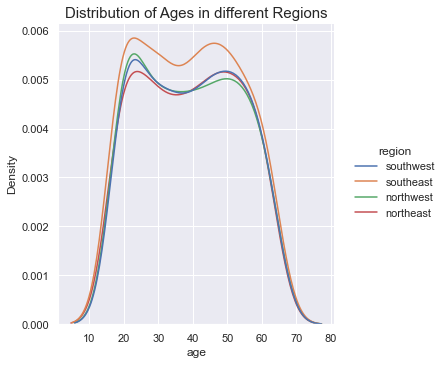

In [8]:
sns.displot(data = data,  x = 'age', hue = 'region', kind = 'kde')
plt.title('Distribution of Ages in different Regions', fontsize = 15)

plt.show()

Showing uniform distribution and similar in all regions.

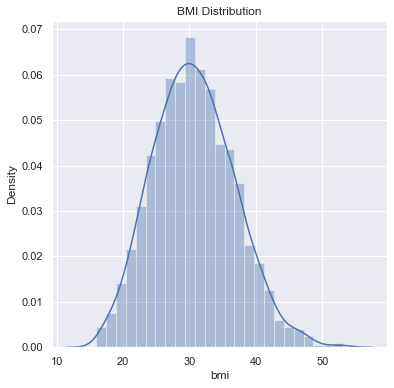

In [9]:
#distribution of bmi values

sns.set()
plt.figure(figsize = (6,6))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

1. As we know, Normal BMI range is 18.5 to 24.9.
2. Most of the people in this dataset are overweight.

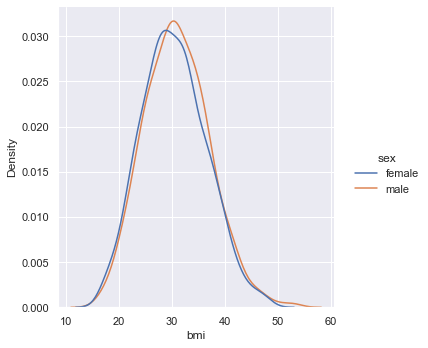

In [10]:
sns.displot(data = data, x = 'bmi', hue = 'sex', kind = 'kde')

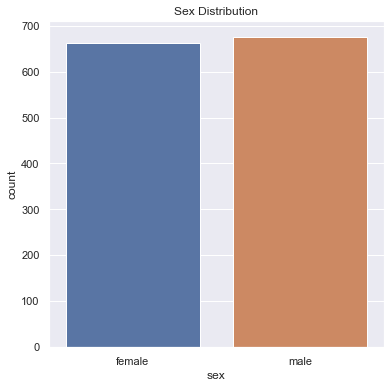

In [11]:
#gender column

plt.figure(figsize = (6,6))

sns.countplot(data = data, x = 'sex')
plt.title('Sex Distribution')
plt.show()

In [12]:
#counts of male and female in dataset
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

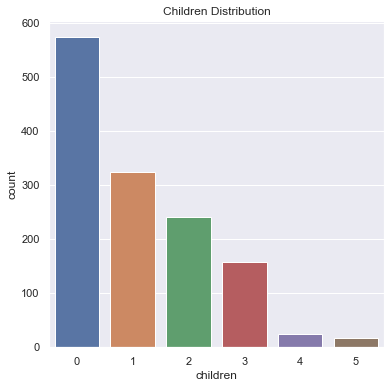

In [13]:
#children column

plt.figure(figsize = (6,6))
sns.countplot(data = data, x = 'children')

plt.title('Children Distribution')
plt.show()

In [14]:
(data['children'].value_counts()/data.shape[0])*100

0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: children, dtype: float64

42.8 % people of the dataset don't have children.

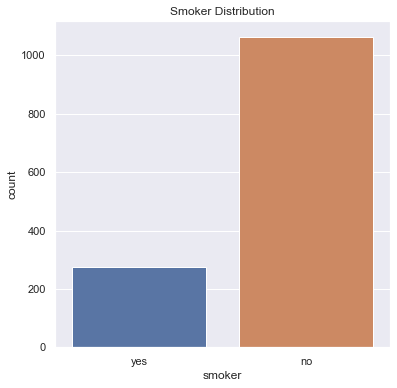

In [15]:
#smoker column

plt.figure(figsize = (6,6))
sns.countplot(data = data, x = 'smoker')

plt.title('Smoker Distribution')
plt.show()

In [16]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

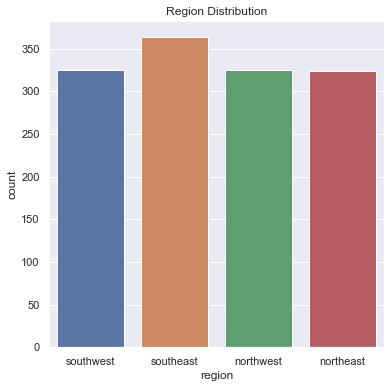

In [17]:
#region column

plt.figure(figsize = (6,6))
sns.countplot(data = data, x = 'region')

plt.title('Region Distribution')
plt.show()

In [18]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 432x432 with 0 Axes>

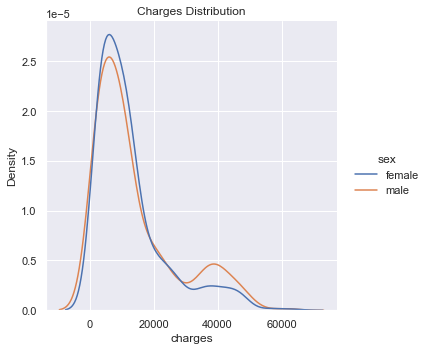

In [19]:
#distribution of charges

plt.figure(figsize = (6,6))
sns.displot(data = data, x = 'charges',hue = 'sex', kind = 'kde')
plt.title('Charges Distribution')
plt.show()

Both Male and Female have almost similar distributions.

<Figure size 720x432 with 0 Axes>

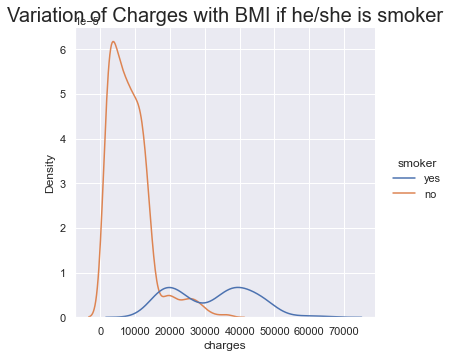

In [20]:
plt.figure(figsize = (10,6))
sns.displot(data = data,  x = 'charges', hue = 'smoker', kind = 'kde')
plt.title('Variation of Charges with BMI if he/she is smoker', fontsize = 20)

plt.show()

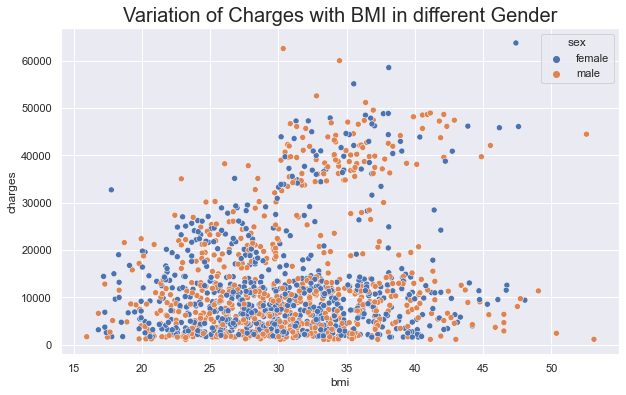

In [21]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = data, x = 'bmi', y = 'charges', hue = 'sex')
plt.title('Variation of Charges with BMI in different Gender', fontsize = 20)

plt.show()

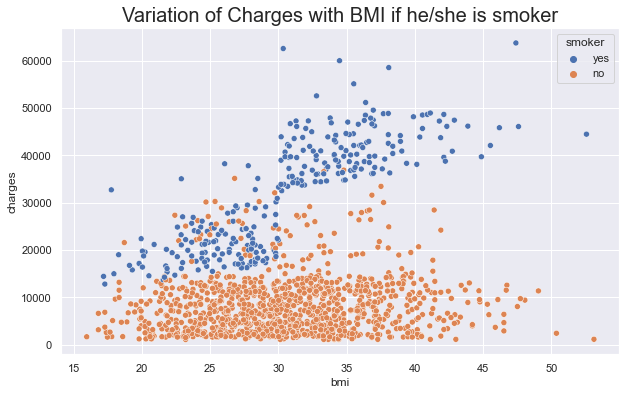

In [22]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = data, x = 'bmi', y = 'charges', hue = 'smoker')
plt.title('Variation of Charges with BMI if he/she is smoker', fontsize = 20)

plt.show()

1. We can't separate linearly and determine the charge using sex.
2. But here seem to have positive correlation between BMI and Charges. Let's confirm finding the value.
3. Persons who are smoker have to pay more charges than non-smoker.

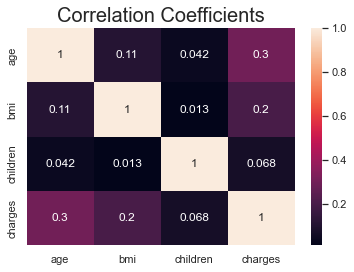

In [23]:
sns.heatmap(data.corr(),  annot = True)
plt.title('Correlation Coefficients', fontsize = 20)
plt.show()

Correlation coefficient values are less.

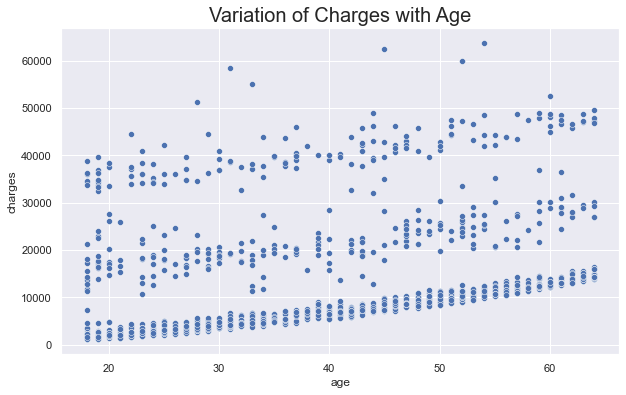

In [24]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = data, x = 'age', y = 'charges')
plt.title('Variation of Charges with Age', fontsize = 20)

plt.show()

More the age, more are the charges. 

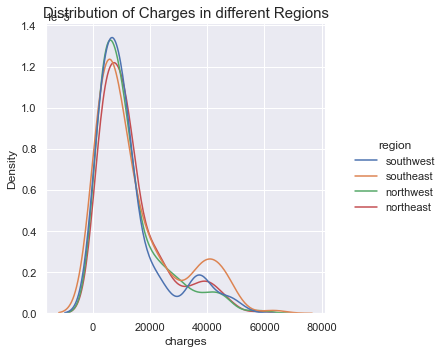

In [25]:
sns.displot(data = data,  x = 'charges', hue = 'region', kind = 'kde')
plt.title('Distribution of Charges in different Regions', fontsize = 15)

plt.show()

1. In all regions, distribution is similar. 
2. Although SouthEast has more proportion of people paying higher charges than in other regions.

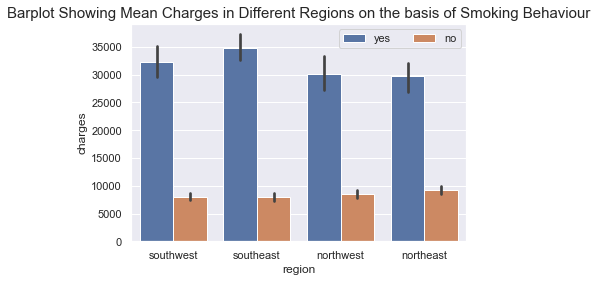

In [26]:
sns.barplot(data = data, x = 'region', y = 'charges', hue = 'smoker')

plt.title('Barplot Showing Mean Charges in Different Regions on the basis of Smoking Behaviour', fontsize = 15)
plt.legend(ncol=2, loc="upper right", frameon=True)
plt.show()

### Data Pre-Processing

###  Encoding the categorical features

In [27]:
#categorical features
cat_features = ['sex', 'smoker', 'region']

In [28]:
#it'll by default convert object datatype to dummies, and all object data tyep features are categorical features
data_encoded = pd.get_dummies(data, drop_first = True)

data_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Splitting Data into Training Data and Testing Data

In [29]:
#taking features required to train the model and removing target feature
X = data_encoded.drop('charges', axis = 1)

y = data_encoded['charges']

In [30]:
#split train and test into 80 - 20 split and keeping randon_state to get repeated results 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

In [31]:
print('Shape of train data X and y respectively : ', x_train.shape, ':', y_train.shape)
print('Shape of test data X and y respectively : ', x_test.shape, ':', y_test.shape)

Shape of train data X and y respectively :  (1070, 8) : (1070,)
Shape of test data X and y respectively :  (268, 8) : (268,)


## Models

In [32]:
def best_hyp_finder_gridsearchcv(train_x, train_y, params, model, scoring = 'neg_root_mean_squared_error', cv = 3):
    
    
    #defining gridserachcv technique with decisiontree classifier model
    reg = GridSearchCV(model, param_grid = params, scoring = scoring, cv = cv, return_train_score = True)
    reg.fit(train_x, y_train)

    results = pd.DataFrame(reg.cv_results_)
    best_params = reg.best_params_
    
    print('Best Hyper Parameters are :', best_params)
    
    return results, best_params

###  1. Linear Regression

##### Model Training

In [33]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

##### Prediction

In [34]:
#prediction on for train and test data

train_predict_lr = lr.predict(x_train)

test_predict_lr  = lr.predict(x_test)

##### Model Evaluation

In [35]:
# compute R2 value for checking performance of model on training and test data

r2_train_lr = metrics.r2_score(y_train, train_predict_lr)

print('R2 score on train data :',r2_train_lr)

r2_test_lr = metrics.r2_score(y_test, test_predict_lr)

print('R2 score on test data :',r2_test_lr)

R2 score on train data : 0.7370262574551634
R2 score on test data : 0.7999876970680433


In [36]:
#rmse 

rmse_train_lr = metrics.mean_squared_error(y_train, train_predict_lr, squared = False)

print('Root mean squared error on train data :',rmse_train_lr)


rmse_test_lr = metrics.mean_squared_error(y_test, test_predict_lr, squared = False)

print('Root mean squared error on test data :',rmse_test_lr)

Root mean squared error on train data : 6140.157418880165
Root mean squared error on test data : 5641.62655885019


### 2. Support Vector Regressor

##### Model Training

In [37]:
svr = SVR(kernel = 'rbf')

# svr.fit(x_train, y_train)

##### Hyper-Parameter tuning

In [38]:
parameters = {'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}

results_svr, best_params_svr = best_hyp_finder_gridsearchcv(x_train, y_train, params = parameters, model = svr, scoring = 'neg_root_mean_squared_error', cv = 3)

Best Hyper Parameters are : {'C': 10000, 'gamma': 0.1}


##### Model training using best hyper params

In [39]:
svr = SVR(kernel = 'rbf', C = best_params_svr['C'], gamma = best_params_svr['gamma'])

svr.fit(x_train, y_train)

#prediction for train and test data

y_tr_pred_svr = svr.predict(x_train)

y_te_pred_svr = svr.predict(x_test)

##### Model Evaluation

In [40]:
# compute R2 value for checking performance of model on training and test data

r2_train_svr = metrics.r2_score(y_train, y_tr_pred_svr)
r2_test_svr = metrics.r2_score(y_test, y_te_pred_svr)

rmse_train_svr = metrics.mean_squared_error(y_train, y_tr_pred_svr, squared = False)
rmse_test_svr = metrics.mean_squared_error(y_test, y_te_pred_svr, squared = False)

print('R2 score on train data :',r2_train_svr)
print('R2 score on test data :',r2_test_svr)
print('Root mean squared error on train data :',rmse_train_svr)
print('Root mean squared error on test data :',rmse_test_svr)

R2 score on train data : 0.48124072081016556
R2 score on test data : 0.36024201365177866
Root mean squared error on train data : 8623.950420138952
Root mean squared error on test data : 10089.82974399823


### 3. KNN Regressor

##### Model Training

In [41]:
knr = KNeighborsRegressor()

In [42]:
parameters = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30]}

results_knr, best_params_knr = best_hyp_finder_gridsearchcv(x_train, y_train, params = parameters, model = knr, scoring = 'neg_root_mean_squared_error', cv = 3)

Best Hyper Parameters are : {'n_neighbors': 20}


##### Model training using best hyper params

In [43]:
knr = KNeighborsRegressor(n_neighbors = 20)

knr.fit(x_train, y_train)

#prediction for train and test data

y_tr_pred_knr = knr.predict(x_train)

y_te_pred_knr = knr.predict(x_test)

##### Model Evaluation

In [44]:
# compute R2 value for checking performance of model on training and test data

r2_train_knr = metrics.r2_score(y_train, y_tr_pred_knr)
r2_test_knr = metrics.r2_score(y_test, y_te_pred_knr)

rmse_train_knr = metrics.mean_squared_error(y_train, y_tr_pred_knr, squared = False)
rmse_test_knr = metrics.mean_squared_error(y_test, y_te_pred_knr, squared = False)

print('R2 score on train data :',r2_train_knr)
print('R2 score on test data :',r2_test_knr)
print('Root mean squared error on train data :',rmse_train_knr)
print('Root mean squared error on test data :',rmse_test_knr)

R2 score on train data : 0.20790212189618384
R2 score on test data : 0.17768406364914913
Root mean squared error on train data : 10656.454548060665
Root mean squared error on test data : 11439.191578446194


### 4. Random Forest Regressor

##### Model Training

In [45]:
#creating instance of RandomForestRegressor
rfr = RandomForestRegressor()

In [46]:
parameters = {'n_estimators' : [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth' : range(2,11)}

results_rfr, best_params_rfr = best_hyp_finder_gridsearchcv(x_train, y_train, params = parameters, model = rfr, scoring = 'neg_root_mean_squared_error', cv = 3)

Best Hyper Parameters are : {'max_depth': 4, 'n_estimators': 1000}


##### Model training using best hyper params

In [47]:
rfr = RandomForestRegressor(max_depth = 4, n_estimators = 200)

rfr.fit(x_train, y_train)

#prediction for train and test data

y_tr_pred_rfr = rfr.predict(x_train)

y_te_pred_rfr = rfr.predict(x_test)

##### Model Evaluation

In [48]:
# compute R2 value for checking performance of model on training and test data

r2_train_rfr = metrics.r2_score(y_train, y_tr_pred_rfr)
r2_test_rfr = metrics.r2_score(y_test, y_te_pred_rfr)

rmse_train_rfr = metrics.mean_squared_error(y_train, y_tr_pred_rfr, squared = False)
rmse_test_rfr = metrics.mean_squared_error(y_test, y_te_pred_rfr, squared = False)

print('R2 score on train data :',r2_train_rfr)
print('R2 score on test data :',r2_test_rfr)
print('Root mean squared error on train data :',rmse_train_rfr)
print('Root mean squared error on test data :',rmse_test_rfr)

R2 score on train data : 0.8666229505801956
R2 score on test data : 0.8990238221160036
Root mean squared error on train data : 4372.842797186067
Root mean squared error on test data : 4008.532821633446


### 5. XGBoostRegressor

##### Model Training

In [49]:
xgbr = XGBRegressor()

##### Hyper-Parameter Tuning

In [50]:
parameters = {'n_estimators' : [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth' : range(2,11)}

results_xgbr, best_params_xgbr = best_hyp_finder_gridsearchcv(x_train, y_train, params = parameters, model = xgbr, scoring = 'neg_root_mean_squared_error', cv = 3)

Best Hyper Parameters are : {'max_depth': 3, 'n_estimators': 10}


##### Model training using best hyper params

In [51]:
xgbr = XGBRegressor(max_depth = 3, n_estimators = 10)

xgbr.fit(x_train, y_train)

#prediction for train and test data

y_tr_pred_xgbr = xgbr.predict(x_train)

y_te_pred_xgbr = xgbr.predict(x_test)

##### Model Evaluation

In [52]:
# compute R2 value for checking performance of model on training and test data

r2_train_xgbr = metrics.r2_score(y_train, y_tr_pred_xgbr)
r2_test_xgbr = metrics.r2_score(y_test, y_te_pred_xgbr)

rmse_train_xgbr = metrics.mean_squared_error(y_train, y_tr_pred_xgbr, squared = False)
rmse_test_xgbr = metrics.mean_squared_error(y_test, y_te_pred_xgbr, squared = False)

print('R2 score on train data :',r2_train_xgbr)
print('R2 score on test data :',r2_test_xgbr)
print('Root mean squared error on train data :',rmse_train_xgbr)
print('Root mean squared error on test data :',rmse_test_xgbr)

R2 score on train data : 0.8643256369544875
R2 score on test data : 0.8970687606214429
Root mean squared error on train data : 4410.341385846858
Root mean squared error on test data : 4047.152609437836


### Models Comparision

In [53]:
#using prettytable library we can build a table, to compare our models
x = PrettyTable()

x.field_names = ['Model', 'Parameters', 'Train_RMSE', 'Test_RMSE', 'Train_R2_Score', 'Test_R2_Score']

x.add_row(['Linear Regression', 'NA', round(rmse_train_lr, 2), round(rmse_test_lr, 2), round(r2_train_lr, 2), round(r2_test_lr, 2)])
x.add_row(['SVR Regressor', best_params_svr, round(rmse_train_svr, 2), round(rmse_test_svr,2), round(r2_train_svr, 2), round(r2_test_svr, 2)])
x.add_row(['KNN Regressor', best_params_knr, round(rmse_train_knr, 2), round(rmse_test_knr, 2), round(r2_train_knr, 2), round(r2_test_knr, 2)])
x.add_row(['Random Forest Regressor', best_params_rfr, round(rmse_train_rfr, 2), round(rmse_test_rfr, 2), round(r2_train_rfr, 2), round(r2_test_rfr, 2)])
x.add_row(['XGBoostRegressor', best_params_xgbr, round(rmse_train_xgbr, 2), round(rmse_test_xgbr, 2), round(r2_train_xgbr, 2), round(r2_test_xgbr, 2)])

print(x)

+-------------------------+----------------------------------------+------------+-----------+----------------+---------------+
|          Model          |               Parameters               | Train_RMSE | Test_RMSE | Train_R2_Score | Test_R2_Score |
+-------------------------+----------------------------------------+------------+-----------+----------------+---------------+
|    Linear Regression    |                   NA                   |  6140.16   |  5641.63  |      0.74      |      0.8      |
|      SVR Regressor      |       {'C': 10000, 'gamma': 0.1}       |  8623.95   |  10089.83 |      0.48      |      0.36     |
|      KNN Regressor      |          {'n_neighbors': 20}           |  10656.45  |  11439.19 |      0.21      |      0.18     |
| Random Forest Regressor | {'max_depth': 4, 'n_estimators': 1000} |  4372.84   |  4008.53  |      0.87      |      0.9      |
|     XGBoostRegressor    |  {'max_depth': 3, 'n_estimators': 10}  |  4410.34   |  4047.15  |      0.86      | 

From above models, Random Forest Regressor seems to be best model.